In [20]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as pl
%matplotlib inline

In [2]:
def ParseTextFile(textFileHandle, topickle=False, convert2DateTime=False, **kwargs):
    """
    * topickle: pickle resulting DataFrame if True
    * convert2DateTime: join date/time columns and convert entries to datetime objects
    * kwargs:
        pkl_fname: pickle file name to save DataFrame by, if topickle=True
    """
    # Pre-compute some regex
    columns = re.compile('^/fields=(.+)') # to get field/column names
    units = re.compile('^/units=(.+)') # to get units -- optional
    endHeader = re.compile('^/end_header') # to know when to start storing data
    # Set some milestones
    noFields = True
    getData = False
    # loop through the text data
    for line in textFileHandle:
        if noFields:
            fieldStr = columns.findall(line)
            if len(fieldStr)>0:
                noFields = False
                fieldList = fieldStr[0].split(',')
                dataDict = dict.fromkeys(fieldList)
                continue # nothing left to do with this line, keep looping
        if not getData:
            if endHeader.match(line):
                # end of header reached, start acquiring data
                getData = True 
        else:
            dataList = line.split(',')
            for field,datum in zip(fieldList, dataList):
                if not dataDict[field]:
                    dataDict[field] = []
                dataDict[field].append(datum)
    df = pd.DataFrame(dataDict, columns=fieldList)
    if convert2DateTime:
        datetimelabels=['year', 'month', 'day', 'hour', 'minute', 'second']
        df['Datetime']= pd.to_datetime(df[datetimelabels],
                                       format='%Y-%m-%dT%H:%M:%S')
        df.drop(datetimelabels, axis=1, inplace=True)
    if topickle:
        fname=kwargs.pop('pkl_fname', 'dfNomad2.pkl')
        df.to_pickle(fname)
    return df

def FindNaNs(df):
    for col in df.columns:
        sn = np.where(df[col].values=='NaN', True, False).sum()
        s9 = np.where('-999' in df[col].values, True, False).sum()
        print("%s: %d NaNs & %d -999s" % (col, sn, s9))
        
def FitPoly(X,y, order=4, lin=False):
    """
    Numpy regression. Returns coeffs.
    kwargs:
        lin: specifies whether data is log transformed. Data is log transformed if not."""
    if lin:
        X = np.log10(X)
        y = np.log10(y)
    coeffs = np.polyfit(X,y,deg=order)
    return coeff

In [3]:
chlacsvfp = '/home/madhatter106/Downloads/1490907415987539_chlor_a.csv'
rrscsvfp = '/home/madhatter106/Downloads/1490907415987539_rrs.csv'

In [4]:
with open(chlacsvfp) as fchl:
    dfChl = ParseTextFile(fchl, topickle=True, pkl_fname='./dfMtUpChla.pkl')
with open(rrscsvfp) as frrs:
    dfRrs = ParseTextFile(frrs, topickle=True, pkl_fname='./dfMtUpRrs.pkl')

In [13]:
dfChl.cruise.unique()

array(['2010_05_wbii', 'abudhabi-masqat', 'ba-ushuaia', 'bb1011',
       'bd02_2010', 'cbp05', 'cv3', 'cv4', 'cv5', 'dfo_canada_chl',
       'glider_calibration', 'icescape2010_asb', 'masqat-mumbay', 's1010'], dtype=object)

In [14]:
dfRrs.cruise.unique()

array(['bats255', 'bats256', 'bats258', 'bats259', 'bats260', 'bats263',
       'greenbay_01', 'pb221', 'pb223', 's1010'], dtype=object)

In [15]:
for entry in dfChl.cruise.unique():
    if entry in dfRrs.cruise.unique():
        print('%s found in both' % entry)

s1010 found in both


In [16]:
dfChl.loc[dfChl.cruise=='s1010',:]

,id,latitude,longitude,date_time,cruise,seawifs_filename,seawifs_es_error,seawifs_pixel_total,seawifs_tdiff,seawifs_solz,...,seawifs_cv,seawifs_windspeed,seawifs_chlor_a,insitu_chlor_a,seawifs_rrs412,seawifs_rrs443,seawifs_rrs490,seawifs_rrs510,seawifs_rrs555,seawifs_rrs670
58,293366,26.42480000,-82.19440000,2010-10-05 18:25:00,s1010,S2010278200632.L2_MLAC.R0000021476_26N_26N_82W...,0.00000000,25,6797,53.89,...,0.093,6.707,3.32302000,1.93200004,0.00376500,0.00442800,0.00557000,0.00592600,0.00705300,0.00167200\n


In [19]:
dfRrs.loc[dfRrs.cruise=='s1010',:]

,id,latitude,longitude,date_time,cruise,seawifs_filename,seawifs_es_error,seawifs_pixel_total,seawifs_tdiff,seawifs_solz,...,seawifs_rrs490,seawifs_rrs510,seawifs_rrs555,seawifs_rrs670,insitu_rrs412,insitu_rrs443,insitu_rrs490,insitu_rrs510,insitu_rrs555,insitu_rrs670
11,293363,26.42480000,-82.19440000,2010-10-05 18:25:00,s1010,S2010278200632.L2_MLAC.R0000021476_26N_26N_82W...,1.30000000,25,6797,53.89,...,0.00557000,0.00592600,0.00705300,0.00167200,0.00156116,0.00219547,0.00368125,0.00427749,0.00541289,0.00124485\n


In [17]:
dfChl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 21 columns):
id                     59 non-null object
latitude               59 non-null object
longitude              59 non-null object
date_time              59 non-null object
cruise                 59 non-null object
seawifs_filename       59 non-null object
seawifs_es_error       59 non-null object
seawifs_pixel_total    59 non-null object
seawifs_tdiff          59 non-null object
seawifs_solz           59 non-null object
seawifs_senz           59 non-null object
seawifs_cv             59 non-null object
seawifs_windspeed      59 non-null object
seawifs_chlor_a        59 non-null object
insitu_chlor_a         59 non-null object
seawifs_rrs412         59 non-null object
seawifs_rrs443         59 non-null object
seawifs_rrs490         59 non-null object
seawifs_rrs510         59 non-null object
seawifs_rrs555         59 non-null object
seawifs_rrs670         59 non-null object
dtypes: object(

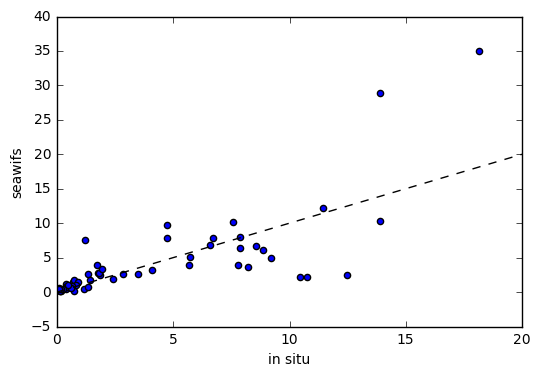

In [31]:
pl.scatter(dfChl.insitu_chlor_a.astype('f8'), dfChl.seawifs_chlor_a.astype('f8'))
pl.xlim((0,20))
pl.xlabel('in situ')
pl.ylabel('seawifs')
pl.plot([0,20],[0,20],'k--')

In [32]:
dfChl['maxBlue'] = dfChl[['seawifs_rrs443', 'seawifs_rrs490','seawifs_rrs510']].max(axis=1)

In [35]:
dfChl['mxBl2Gr'] = dfChl.maxBlue / dfChl.seawifs_rrs555.astype('f8')

In [36]:
dfChl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 23 columns):
id                     59 non-null object
latitude               59 non-null object
longitude              59 non-null object
date_time              59 non-null object
cruise                 59 non-null object
seawifs_filename       59 non-null object
seawifs_es_error       59 non-null object
seawifs_pixel_total    59 non-null object
seawifs_tdiff          59 non-null object
seawifs_solz           59 non-null object
seawifs_senz           59 non-null object
seawifs_cv             59 non-null object
seawifs_windspeed      59 non-null object
seawifs_chlor_a        59 non-null object
insitu_chlor_a         59 non-null object
seawifs_rrs412         59 non-null object
seawifs_rrs443         59 non-null object
seawifs_rrs490         59 non-null object
seawifs_rrs510         59 non-null object
seawifs_rrs555         59 non-null object
seawifs_rrs670         59 non-null object
maxBlue        

In [40]:
colsIWant = ['id', 'latitude', 'longitude', 'date_time', 'cruise',
            'seawifs_solz', 'seawifs_senz','seawifs_windspeed','seawifs_tdiff','mxBl2Gr',
             'insitu_chlor_a','seawifs_chlor_a'] 
dfChlMups = dfChl[colsIWant]

In [42]:
for col in colsIWant[1:3] + colsIWant[5:8]+colsIWant[9:]:
    dfChlMups[col] = dfChlMups[col].astype('f8')

/home/madhatter106/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [45]:
for col in ['id','seawifs_tdiff']:
    dfChlMups.loc[:,col] = dfChlMups.loc[:,col].astype('i8')

/home/madhatter106/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [47]:
dfChlMups.date_time = pd.to_datetime(dfChlMups.date_time)

/home/madhatter106/anaconda3/lib/python3.5/site-packages/pandas/core/generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [50]:
dfChlMups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 12 columns):
id                   59 non-null int64
latitude             59 non-null float64
longitude            59 non-null float64
date_time            59 non-null datetime64[ns]
cruise               59 non-null object
seawifs_solz         59 non-null float64
seawifs_senz         59 non-null float64
seawifs_windspeed    59 non-null float64
seawifs_tdiff        59 non-null int64
mxBl2Gr              59 non-null float64
insitu_chlor_a       59 non-null float64
seawifs_chlor_a      59 non-null float64
dtypes: datetime64[ns](1), float64(8), int64(2), object(1)
memory usage: 5.6+ KB


In [57]:
dfChlMups.rename(columns={'mxBl2Gr':'seawifs_mxBl2Gr'}, inplace=True)

/home/madhatter106/anaconda3/lib/python3.5/site-packages/pandas/core/frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [58]:
dfChlMups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 12 columns):
id                   59 non-null int64
latitude             59 non-null float64
longitude            59 non-null float64
date_time            59 non-null datetime64[ns]
cruise               59 non-null object
seawifs_solz         59 non-null float64
seawifs_senz         59 non-null float64
seawifs_windspeed    59 non-null float64
seawifs_tdiff        59 non-null int64
seawifs_mxBl2Gr      59 non-null float64
insitu_chlor_a       59 non-null float64
seawifs_chlor_a      59 non-null float64
dtypes: datetime64[ns](1), float64(8), int64(2), object(1)
memory usage: 5.6+ KB


In [59]:
dfChlMups.to_pickle('./dfSwfChloraMups2010p.pkl')